<h1>Analiza titlurilor articolelor ale site-urilor românești de știri </h1>
<h3>-Mario Ernest Uță</h3>
<br/>
<h4> Prin această lucrare se dorește analiza titlurilor de articolelor apărute pe unele dintre cele mai poluare site-uri de știri din România: Digi24, ProTV și Observator. Analiza titlurilor constă în căutarea anumitor cuvinte cheie în titlurile articolelor, pentru a observa dacă există o creștere a utilizării acestora în anumite perioade de timp și pentru a determina dacă utilizarea frecventă a acestor cuvinte in titlurile de știri indică o schimbare în ceea ce privește venitul mediu pe cap de locuitor în România.</h4>


<h4> Lista cuvintelor cheie (fișierul badwords.txt) este compusă din cuvinte care au în general o conotație negativă, care ar putea indica o scădere a nivelului de trai. Aceste cuvinte au fost împartite in 3 categorii:</h4>
<ul>
    <li>Economic. Cuvinte legate de economia țării sau de veniturile oamenilor(ex: inflație, recesiune, deficit)</li>
    <li>Război/Tragedie. Cuvinte legate de conflicte armate sau de catastrofe (ex: bombardament, explozie, victime) </li>
    <li>Pandemie. Cuvinte legate de pandemia de COVID-19(ex: carantină, coronavirus, restricții)</li>
    
</ul>

<h4>Pentru colectarea informațiilor, s-au folosit mai multe script-uri Python care analizeaza titlurile articolelor de știri și salvează cuvintele cheie găsite pe fiecare titlu în parte. S-au analizat urmatoarele categorii de știri pentru fiecare site:</h4>
<ul>
    <li>Digi24. Categorii: "Ultimele știri".Număr articole:366851. Perioada:2012-2024</li>
    <li>ProTV. Categorii: "Politic","Financiar","Social","Internațional".Număr articole:163656. Perioada: 2008-2024 </li>
    <li>Observator. Categorii: "Politic","Economic","Extern","Internațional".Număr articole:106596. Perioada:2010-2024</li>
    <li>Număr total articole: 637103</li>
</ul>
<h4>Datele au fost salvate în formatul .csv, cu coloanele: "link_articol", "platforma", "data" și "cuvinte_cheie" </h4>
<h4>Pentru ilustrarea datelor se va folosi librăria Python Matplotlib</h4>


In [1]:
import matplotlib.pyplot as plt

<h4>Procesam datele obținute pentru a le putea ilustra</h4>

In [2]:
with open("Database/digi24.csv", "r") as f:
    f.readline()
    digi=[x.split(",") for x in f.readlines()]

with open("Database/protv.csv", "r") as f:
    f.readline()
    protv=[x.split(",") for x in f.readlines()]

with open("Database/observator.csv", "r") as f:
    f.readline()
    observator=[x.split(",") for x in f.readlines()]

<h4>Construim lista cu cuvinte cheie</h4>

In [3]:
with open("badwords.txt","r") as f:
    badwords=f.readlines()
    badwords=[x.rstrip() for x in badwords if x[0]!= "#"]

<h4>Construim două dicționare pentru fiecare site de știri analizat. Dicționarul year_ va reține numarul de articole dintr-un an, iar dicționarul va word_ reține numarul de apariții al cuvintelor cheie în titlurile articolelor din fiecare an</h4>


In [4]:
yearDigi={str(x):0 for x in range(1999,2025)}
wordsDigi={str(x):0 for x in range(1999,2025)}

yearProTv={str(x):0 for x in range(1999,2025)}
wordsProTv={str(x):0 for x in range(1999,2025)}

yearObservator={str(x):0 for x in range(1999,2025)}
wordsObservator={str(x):0 for x in range(1999,2025)}

<h4>Aflăm numarul de articole din fiecare an și numărul de apariții al cuvintelor cheie în titlurile articolelor din fiecare an</h4>

In [5]:
for i in digi:
    date=i[2].split('.')
    yearDigi[date[2]]+=1
    for cuv in badwords:
        if(cuv in i[3]):
            wordsDigi[date[2]]+=1

for i in protv:
    date=i[2].split('.')
    yearProTv[date[2]]+=1
    for cuv in badwords:
        if(cuv in i[3]):
            wordsProTv[date[2]]+=1

for i in observator:
    date=i[2].split('.')
    yearObservator[date[2]]+=1
    for cuv in badwords:
        if(cuv in i[3]):
            wordsObservator[date[2]]+=1

<h4>Facem raportul dintre numărul de cuvinte cheie apărut in titlurile articolelor din fiecare an și numărul de articole din fiecare an</h4>

In [6]:
dataDigi=[round(wordsDigi[str(i)]/yearDigi[str(i)],2) for i in range (1999,2025) if yearDigi[str(i)]]
dataProTv=[round(wordsProTv[str(i)]/yearProTv[str(i)],2) for i in range (1999,2025) if yearProTv[str(i)]]
dataObs=[round(wordsObservator[str(i)]/yearObservator[str(i)],2) for i in range (1999,2025) if yearObservator[str(i)]]

<h4>Construim graficul</h4>

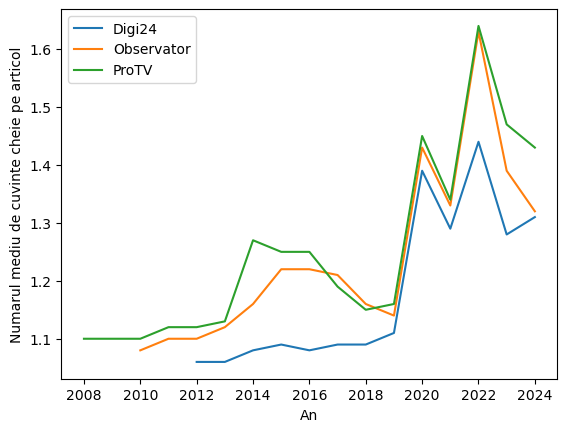

In [9]:
plt.figure(num=0,dpi=100)
plt.plot([x for x in range(2012,2025)],dataDigi,label="Digi24")
plt.plot([x for x in range(2010,2025)],dataObs,label="Observator")
plt.plot([x for x in range(2008,2025)],dataProTv,label="ProTV")
plt.xlabel("An")
plt.ylabel("Numarul mediu de cuvinte cheie pe articol")
plt.legend()
plt.show()

<h4>Din graficul anterior se pot trage urmatoarele concluzii:</h4>
<ul> 
    <li>O creștere considerabilă a numărului de cuvinte cheie folosite per articol în ultimii ani, fapt ce poate fi explicat de pandemia de COVID-19(2019) si de războiul ruso-ucrainean(2022)</li>
    <li>Toate cele trei posturi de știri au graficul extrem de asemănător, ceea ce indică o similiaritate a subiectelor abordate de cele trei posturi de știri</li>
</ul>